<a href="https://colab.research.google.com/github/thanujTa/machine-learning-projects/blob/machine-learning/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Looking at the Data

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [28]:
df = pd.read_csv("/content/QualityPrediction.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
df.isnull().sum()
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [32]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [33]:
df.quality.value_counts()/len(df)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

In [34]:
len(df)

1599

In [35]:
# histogram plot function

def hist_df(col):
  ax = sns.distplot(df[col], bins =6)
  Q1 = np.percentile(df[col],25)
  Q3 = np.percentile(df[col],75)
  IQR = Q3-Q1
  lower_threshold = Q1-1.5*IQR
  upper_threshold = Q3 +1.5*IQR

  ax.axvline(Q1, color= "red", linestyle = "-", label = "Q1")
  ax.axvline(Q3, color= "blue", linestyle = "-", label = "Q3")
  ax.axvline(lower_threshold, color="black", linestyle = "-", label="Lower Threshold")
  ax.axvline(upper_threshold, color="green", linestyle = "-", label="Upper Threshold")
  ax.legend()

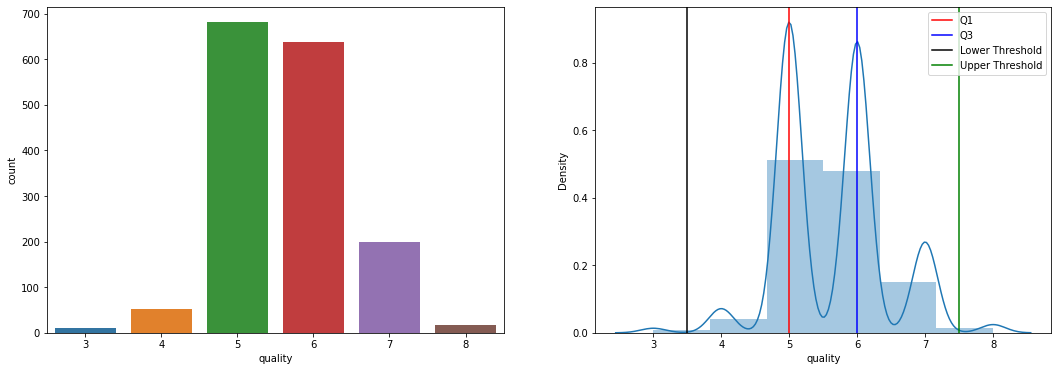

In [36]:
fig = plt.figure(figsize= (18,6))


ax1 = fig.add_subplot(121)
ax1 = sns.countplot(df["quality"])
ax2 = fig.add_subplot(122)
ax2 = hist_df("quality")
plt.show()

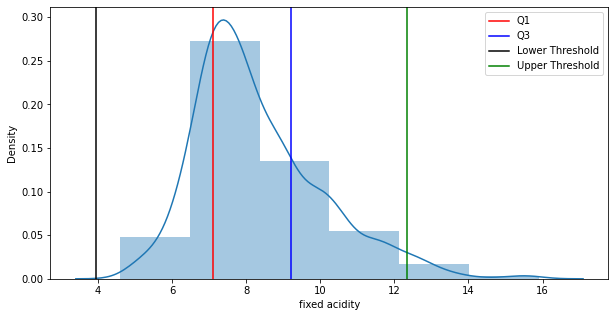

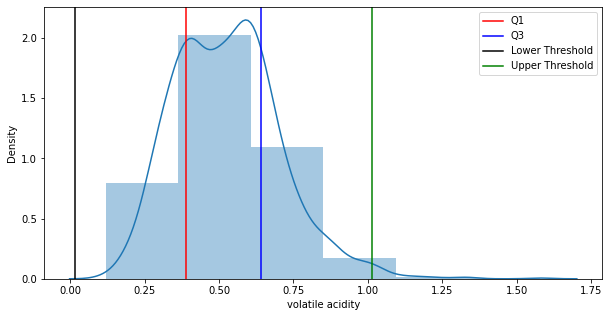

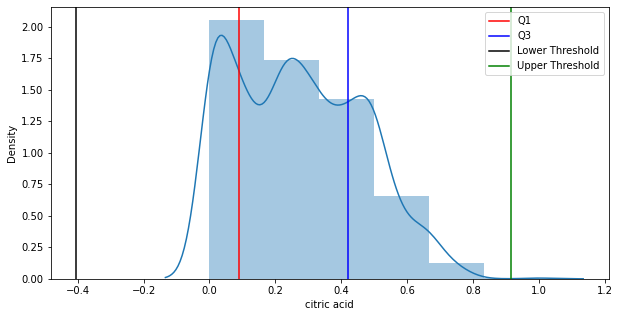

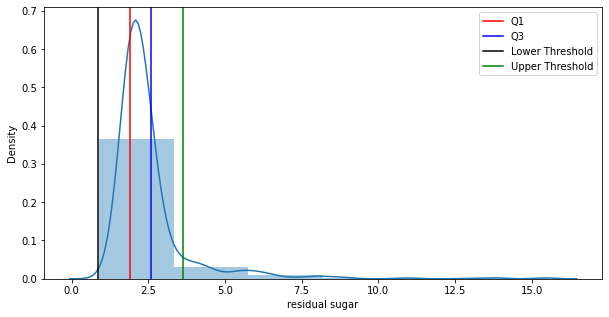

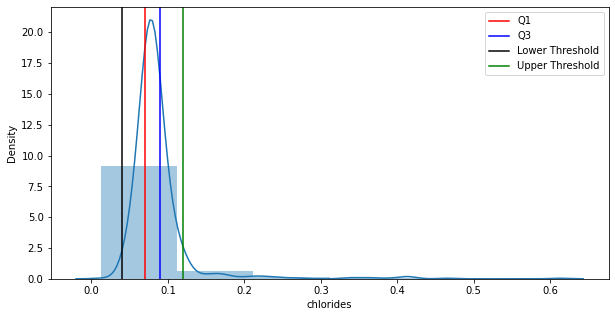

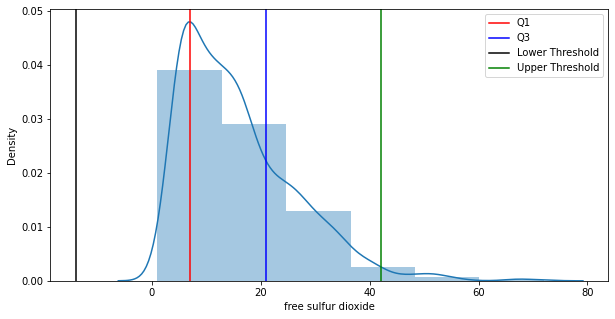

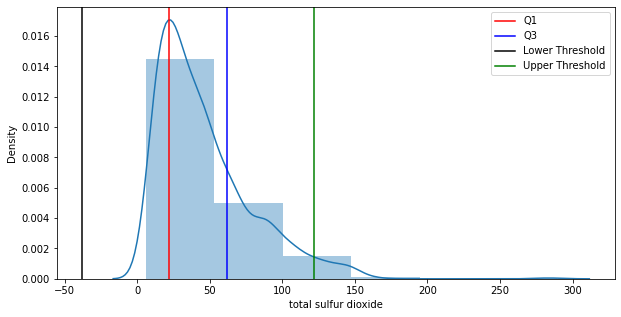

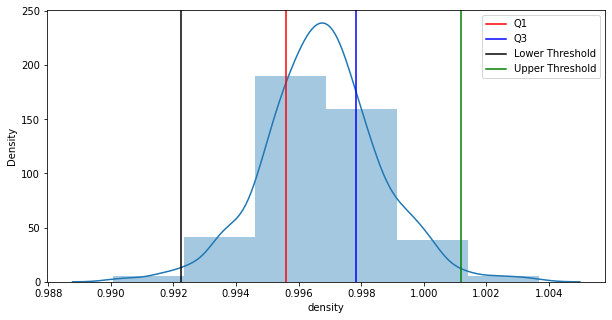

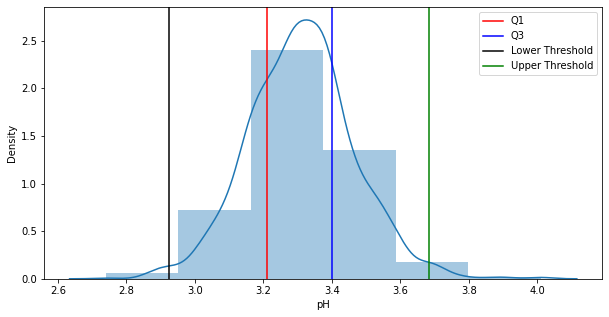

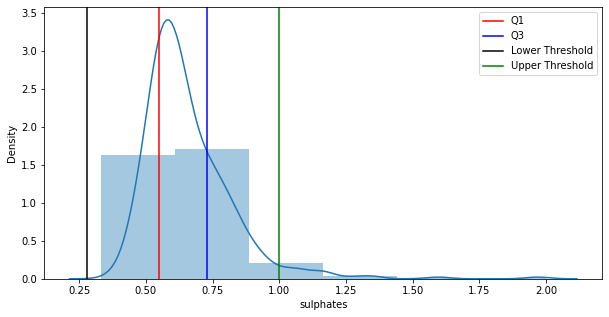

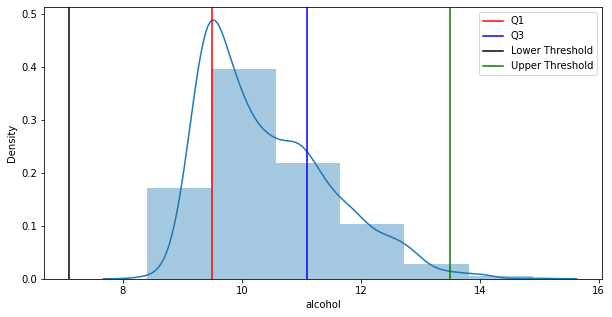

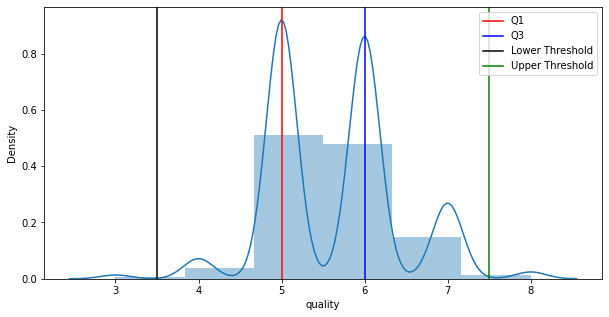

In [37]:
for i in df.columns:
  f,(ax1) = plt.subplots(1,1,figsize = (10,5))
  ax1 = hist_df(i)

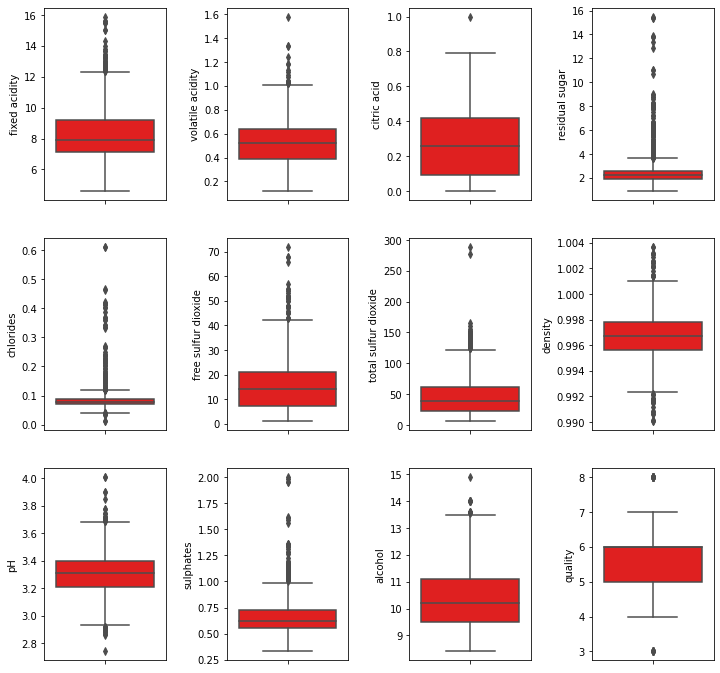

In [38]:
# outliers
fig , ax = plt.subplots(ncols=4, nrows=3, figsize=(12,12))
index = 0
ax = ax.flatten()

for col in df.columns:
  sns.boxplot(y=col, data= df, ax = ax[index], color = "r")
  plt.subplots_adjust(wspace=.5)
  index +=1

In [39]:
c=df.corr()
c

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


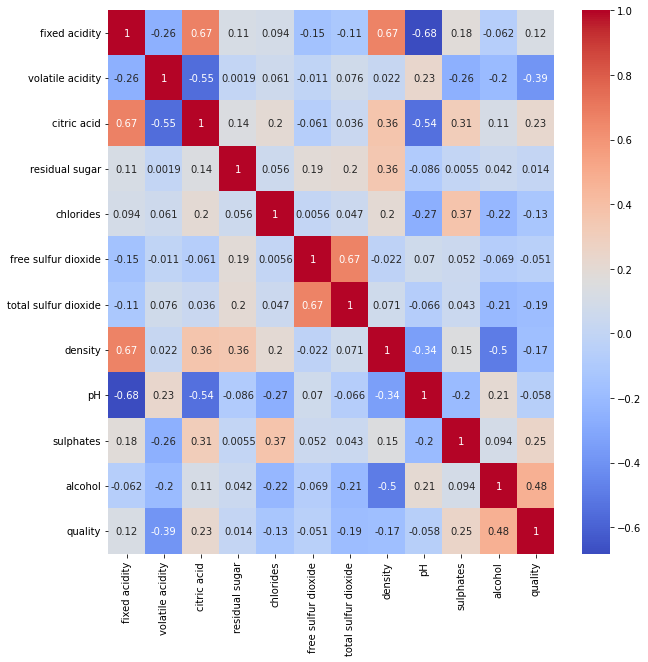

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(c, cmap="coolwarm", annot =True)

##preprocessig the data

In [89]:
dfml = df.copy()
dfml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
bins = [0,6,10]
labels=["poor","good"]
dfml["quality"]=pd.cut(dfml["quality"], bins=bins, labels=labels)

In [91]:
label_quality=LabelEncoder()
dfml["quality"]=label_quality.fit_transform(dfml["quality"])
dfml["quality"].value_counts()

1    1382
0     217
Name: quality, dtype: int64

### train_test splitting

In [92]:
x = dfml.drop("quality", axis = 1)
y = dfml["quality"]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [94]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [107]:
lst_model = []
lst_accuracy  = []
lst_accuracy_train = []
lst_accuracy_test = [] 
lst_cv_score = []
lst_TP = []
lst_TN = []
lst_FP = []
lst_FN = []

# fuction : accepts input model which is nothing but object instantiated of an algos
def applyMLmodel(model):
    # train the model
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test) * 100
    lst_accuracy.append(accuracy)
    print("Accuracy :", accuracy)
    
    # cross-validation , y_train.ravel() is similar to y_train.reshape(-1)
    cv = cross_val_score(estimator = model, X = x_train, y = y_train.ravel(), cv = 10)
    lst_cv_score.append(cv.mean())
    print("CV Score :", cv.mean())
    
    # predicting accuracy for training data set
    y_pred_train = model.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    lst_accuracy_train.append(accuracy_train)
    print("Accuracy(Training) :", accuracy_train)

    # predicting accuracy for test data set
    y_pred_test = model.predict(x_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    lst_accuracy_test.append(accuracy_test)
    print("Accuracy(Test) :", accuracy_test)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix :")
    print(cm)

    # storing TN,TP,FN and FP as a part of list
    lst_TN.append(cm[0,0])
    lst_FP.append(cm[0,1])
    lst_FN.append(cm[1,0])
    lst_TP.append(cm[1,1])
#LogisticRegression
model = LogisticRegression()
applyMLmodel(model) 
lst_model.append("LogisticRegression")


#DecisionTreeClassifier
model = DecisionTreeClassifier()
applyMLmodel(model)
lst_model.append("DecisionTreeClassifier")

#RandomForestClassifier
model = RandomForestClassifier()
applyMLmodel(model)
lst_model.append("RandomForestClassifier")

#KNearest
model =KNeighborsClassifier()  
applyMLmodel(model)
lst_model.append("KNeighborsClassifier")

#GaussianNB - Naive Bayes
model = GaussianNB()
applyMLmodel(model)
lst_model.append("GaussianNB")

Accuracy : 87.5
CV Score : 0.885857529527559
Accuracy(Training) : 0.8858483189992181
Accuracy(Test) : 0.875
Confusion Matrix :
[[ 12  35]
 [  5 268]]
Accuracy : 84.375
CV Score : 0.8780573326771653
Accuracy(Training) : 1.0
Accuracy(Test) : 0.84375
Confusion Matrix :
[[ 22  25]
 [ 25 248]]
Accuracy : 88.4375
CV Score : 0.9101070374015748
Accuracy(Training) : 1.0
Accuracy(Test) : 0.884375
Confusion Matrix :
[[ 20  27]
 [ 10 263]]
Accuracy : 87.5
CV Score : 0.8725701279527559
Accuracy(Training) : 0.9124315871774824
Accuracy(Test) : 0.875
Confusion Matrix :
[[ 19  28]
 [ 12 261]]
Accuracy : 85.3125
CV Score : 0.8373462106299213
Accuracy(Training) : 0.8389366692728695
Accuracy(Test) : 0.853125
Confusion Matrix :
[[ 35  12]
 [ 35 238]]


## comparing the results of all the models

In [122]:
df_pred = pd.DataFrame.from_dict({"model":np.array(lst_model),
                        "Accuracy":np.array(lst_accuracy),
                        "Accuracy(Training)":np.array(lst_accuracy_train),
                        "Accuracy(Test)":np.array(lst_accuracy_train),
                        "cv_score": np.array(lst_cv_score),
                        "True_Positive": np.array(lst_TP),
                        "True_Negative":np.array(lst_TN),
                        "False_Positive":np.array(lst_FP),
                        "False_Negative":np.array(lst_FN)
                        })

df_pred

,model,Accuracy,Accuracy(Training),Accuracy(Test),cv_score,True_Positive,True_Negative,False_Positive,False_Negative
0,LogisticRegression,87.5000,0.885848,0.885848,0.885858,268,12,35,5
1,DecisionTreeClassifier,84.3750,1.000000,1.000000,0.878057,248,22,25,25
2,RandomForestClassifier,88.4375,1.000000,1.000000,0.910107,263,20,27,10
3,KNeighborsClassifier,87.5000,0.912432,0.912432,0.872570,261,19,28,12
4,GaussianNB,85.3125,0.838937,0.838937,0.837346,238,35,12,35


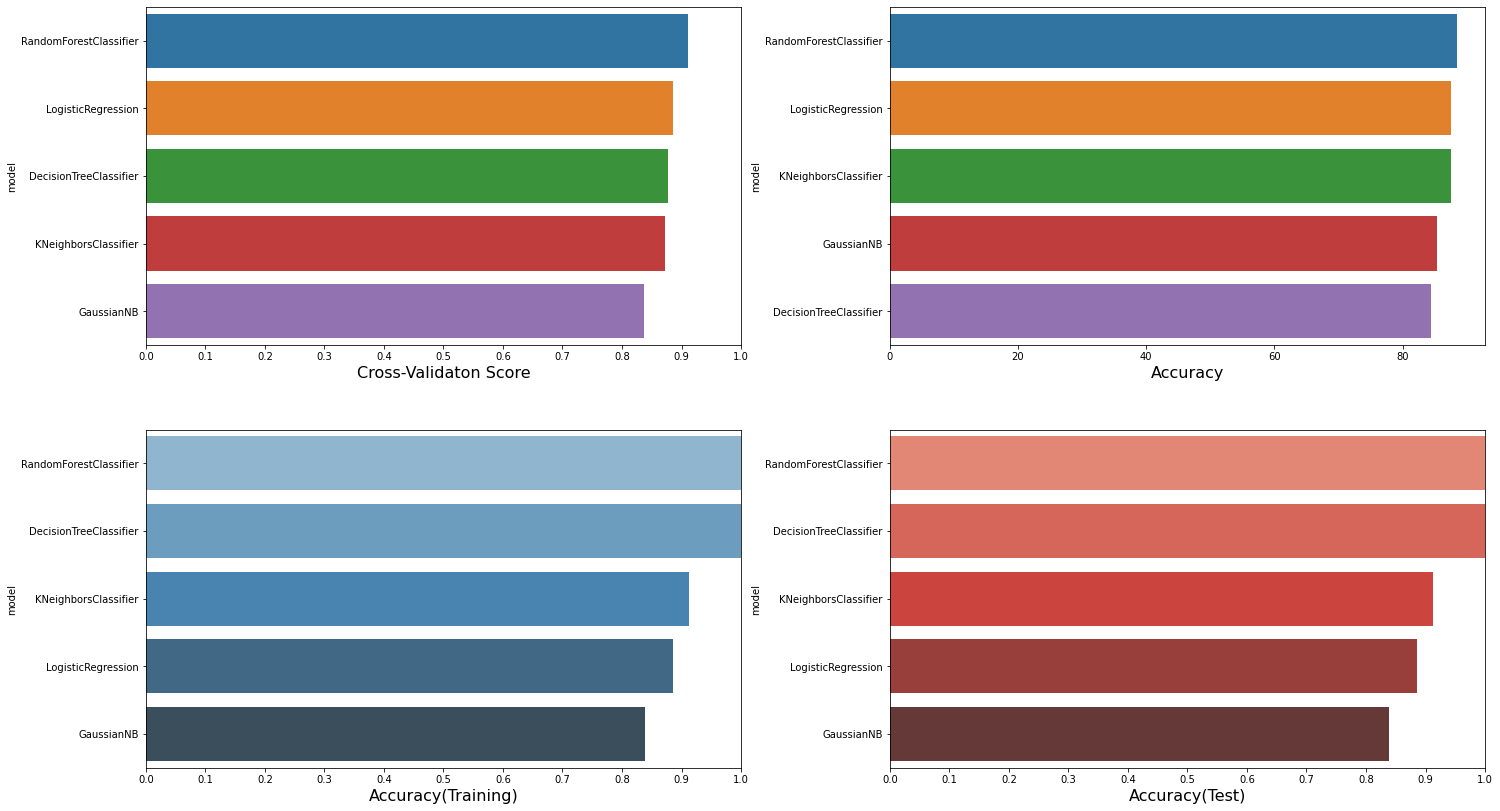

In [123]:
fig, ax = plt.subplots(2,2, figsize=(24,14))
plt.subplots_adjust(wspace = .25, hspace = .25)
#comparing CV score
df_pred.sort_values(by=['cv_score'], ascending=False, inplace=True)

sns.barplot(x='cv_score', y='model', data = df_pred, ax = ax[0][0])
ax[0][0].set_xlabel('Cross-Validaton Score', size=16)
ax[0][0].set_ylabel('model')
ax[0][0].set_xlim(0,1.0)
ax[0][0].set_xticks(np.arange(0, 1.1, 0.1))

#comparing accuracy
df_pred.sort_values(by=['Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Accuracy', y='model', data = df_pred, ax = ax[0][1])
ax[0][1].set_xlabel('Accuracy', size=16)
ax[0][1].set_ylabel('model')

#comparing accuracy(training)
df_pred.sort_values(by=['Accuracy(Training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(Training)', y='model', data = df_pred, palette='Blues_d', ax = ax[1][0])
ax[1][0].set_xlabel('Accuracy(Training)', size=16)
ax[1][0].set_ylabel('model')
ax[1][0].set_xlim(0,1.0)
ax[1][0].set_xticks(np.arange(0, 1.1, 0.1))

#comparing accuracy(testing)
df_pred.sort_values(by=['Accuracy(Test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(Test)', y='model', data = df_pred, palette='Reds_d', ax = ax[1][1])
ax[1][1].set_xlabel('Accuracy(Test)', size=16)
ax[1][1].set_ylabel('model')
ax[1][1].set_xlim(0,1.0)
ax[1][1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

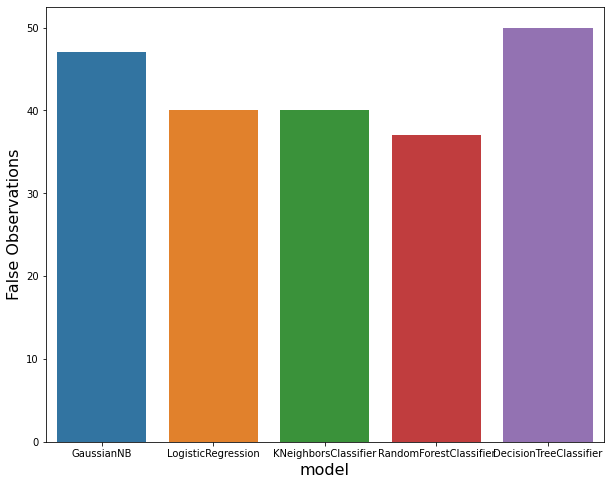

In [124]:
df_pred.sort_values(by=(['Accuracy(Test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x = df_pred['model'], y=df_pred['False_Positive'] + df_pred['False_Negative'], ax = axe)
axe.set_xlabel('model', size=16)
axe.set_ylabel('False Observations', size=16)

plt.show()